# <font color=darkblue> Problem Statement -  Linear Regression
<font color= darkblue> You are hired by a company Gem Stones co ltd, which is a cubic zirconia 
manufacturer. You are provided with the dataset containing the prices and other 
attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond 
alternative with many of the same qualities as a diamond). The company is earning 
different profits on different prize slots. You have to help the company in predicting 
the price for the stone on the bases of the details given in the dataset so it can 
distinguish between higher profitable stones and lower profitable stones so as to 
have better profit share. Also, provide them with the best 5 attributes that are most 
important.

### <font color=red> 1.1) Read the data and do exploratory data analysis.Describe the data briefly. (Check the null values, Data types, shape, EDA). Perform Univariate and Bivariate Analysis.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import statsmodels.formula.api as sm

from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics


In [2]:
# Importing the cubic_zirconia dataset and lets name our dataframe as gem

gem=pd.read_csv('cubic_zirconia.csv')
gem

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...,...,...,...,...
26962,26963,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,26964,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,26965,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,26966,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682


In [3]:
# Filter the unnamed column showing row no

gem.drop(gem.filter(regex='Unnamed'),axis=1,inplace=True)
gem

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...,...,...,...
26962,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682


In [4]:
# Shape of dataset

gem.shape

(26967, 10)

In [5]:
gem['clarity'].unique()

array(['SI1', 'IF', 'VVS2', 'VS1', 'VVS1', 'VS2', 'SI2', 'I1'],
      dtype=object)

#### The dataset contains totally 10 variables and 26967 observations  

In [6]:
gem.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [7]:
# Identifying the presence of null values

gem.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

#### The variable depth has got 697 null entries which needs to be either removed or imputed

In [8]:
# Checking for any duplicate entries

duplicates=gem.duplicated()

print("Duplicates count:",duplicates.sum())
gem[duplicates]

Duplicates count: 34


,carat,cut,color,clarity,depth,table,x,y,z,price
4756,0.35,Premium,J,VS1,62.4,58.0,5.67,5.64,3.53,949
6215,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.00,2130
8144,0.33,Ideal,G,VS1,62.1,55.0,4.46,4.43,2.76,854
8919,1.52,Good,E,I1,57.3,58.0,7.53,7.42,4.28,3105
9818,0.35,Ideal,F,VS2,61.4,54.0,4.58,4.54,2.80,906
10473,0.79,Ideal,G,SI1,62.3,57.0,5.90,5.85,3.66,2898
10500,1.00,Premium,F,VVS2,60.6,54.0,6.56,6.52,3.96,8924
12894,1.21,Premium,D,SI2,62.5,57.0,6.79,6.71,4.22,6505
13547,0.43,Ideal,G,VS1,61.9,55.0,4.84,4.86,3.00,943
13783,0.79,Ideal,G,SI1,62.3,57.0,5.90,5.85,3.66,2898


In [9]:
# Dropping the duplicates

gem.drop_duplicates(inplace=True)

In [10]:
# Revisit the count of duplicates after removal

duplicates=gem.duplicated()

print("Duplicates count:",duplicates.sum())
gem[duplicates]

Duplicates count: 0


,carat,cut,color,clarity,depth,table,x,y,z,price


In [11]:
# Examining the data type of all the variables

gem.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

### Numerical and Categorical variables

#### 7 Numerical variables - The dataset contains 6 float datatype variables and 1 integer datatype variable

#### 3 Categorical variables - The dataset contains 3 object datatype variables

### Target variable - Price

In [12]:
# Descriptive statistics of all the 7 numerical variables

gem.describe()

,carat,depth,table,x,y,z,price
count,26933.000000,26236.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000
mean,0.798010,61.745285,57.455950,5.729346,5.733102,3.537769,3937.526120
std,0.477237,1.412243,2.232156,1.127367,1.165037,0.719964,4022.551862
min,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.700000,3.520000,2375.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5356.000000
max,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


#### Under our analysis, from the initial observation its clearly visible that mean for most of the variables differ from the median i.e. skewed data
#### 50% of the gems price fall below 2375 INR

In [13]:
# Descriptive statistics of all the 3 categorical variables

gem.describe(include=object)

,cut,color,clarity
count,26933,26933,26933
unique,5,7,8
top,Ideal,G,SI1
freq,10805,5653,6565


### Univariate analysis

Text(0.5, 1.0, 'Box Plot of price Distribution')

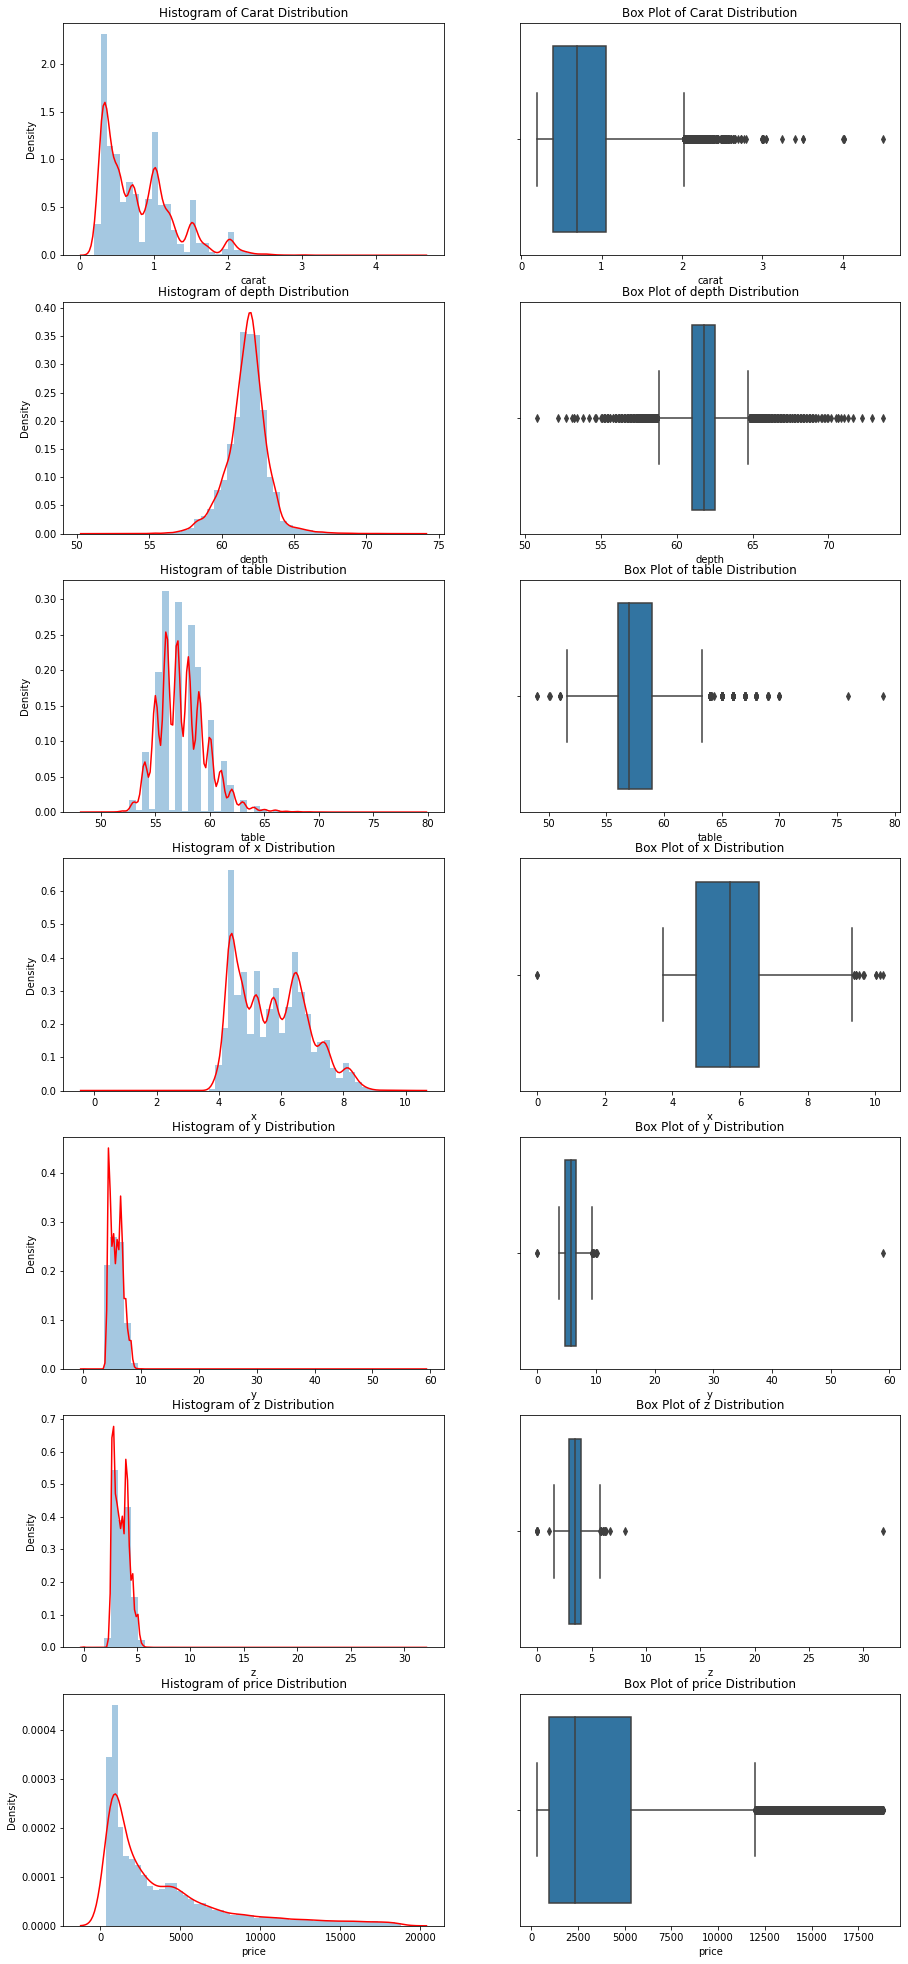

In [14]:
fig,axes=plt.subplots(nrows=7,ncols=2)
fig.set_size_inches(15,35)

# Carat

carat=sns.distplot(gem['carat'], ax=axes[0][0], kde_kws={"color": "r"})
carat.set_title('Histogram of Carat Distribution')
carat=sns.boxplot(gem['carat'], ax=axes[0][1])
carat.set_title('Box Plot of Carat Distribution')

# depth

depth=sns.distplot(gem['depth'], ax=axes[1][0], kde_kws={"color": "r"})
depth.set_title('Histogram of depth Distribution')
depth=sns.boxplot(gem['depth'], ax=axes[1][1])
depth.set_title('Box Plot of depth Distribution')

# table

table=sns.distplot(gem['table'], ax=axes[2][0], kde_kws={"color": "r"})
table.set_title('Histogram of table Distribution')
table=sns.boxplot(gem['table'], ax=axes[2][1])
table.set_title('Box Plot of table Distribution')

# x

x=sns.distplot(gem['x'], ax=axes[3][0], kde_kws={"color": "r"})
x.set_title('Histogram of x Distribution')
x=sns.boxplot(gem['x'], ax=axes[3][1])
x.set_title('Box Plot of x Distribution')

# y

y=sns.distplot(gem['y'], ax=axes[4][0], kde_kws={"color": "r"})
y.set_title('Histogram of y Distribution')
y=sns.boxplot(gem['y'], ax=axes[4][1])
y.set_title('Box Plot of y Distribution')

# z

z=sns.distplot(gem['z'], ax=axes[5][0], kde_kws={"color": "r"})
z.set_title('Histogram of z Distribution')
z=sns.boxplot(gem['z'], ax=axes[5][1])
z.set_title('Box Plot of z Distribution')

# price

price=sns.distplot(gem['price'], ax=axes[6][0], kde_kws={"color": "r"})
price.set_title('Histogram of price Distribution')
price=sns.boxplot(gem['price'], ax=axes[6][1])
price.set_title('Box Plot of price Distribution')

#### Under our analysis among all the variables, variable 'depth' has got the normally distributed curve, other variables have got the skewed distribution
#### Outliers are present in almost all the variables

## Bivariate analysis

### Numerical variables

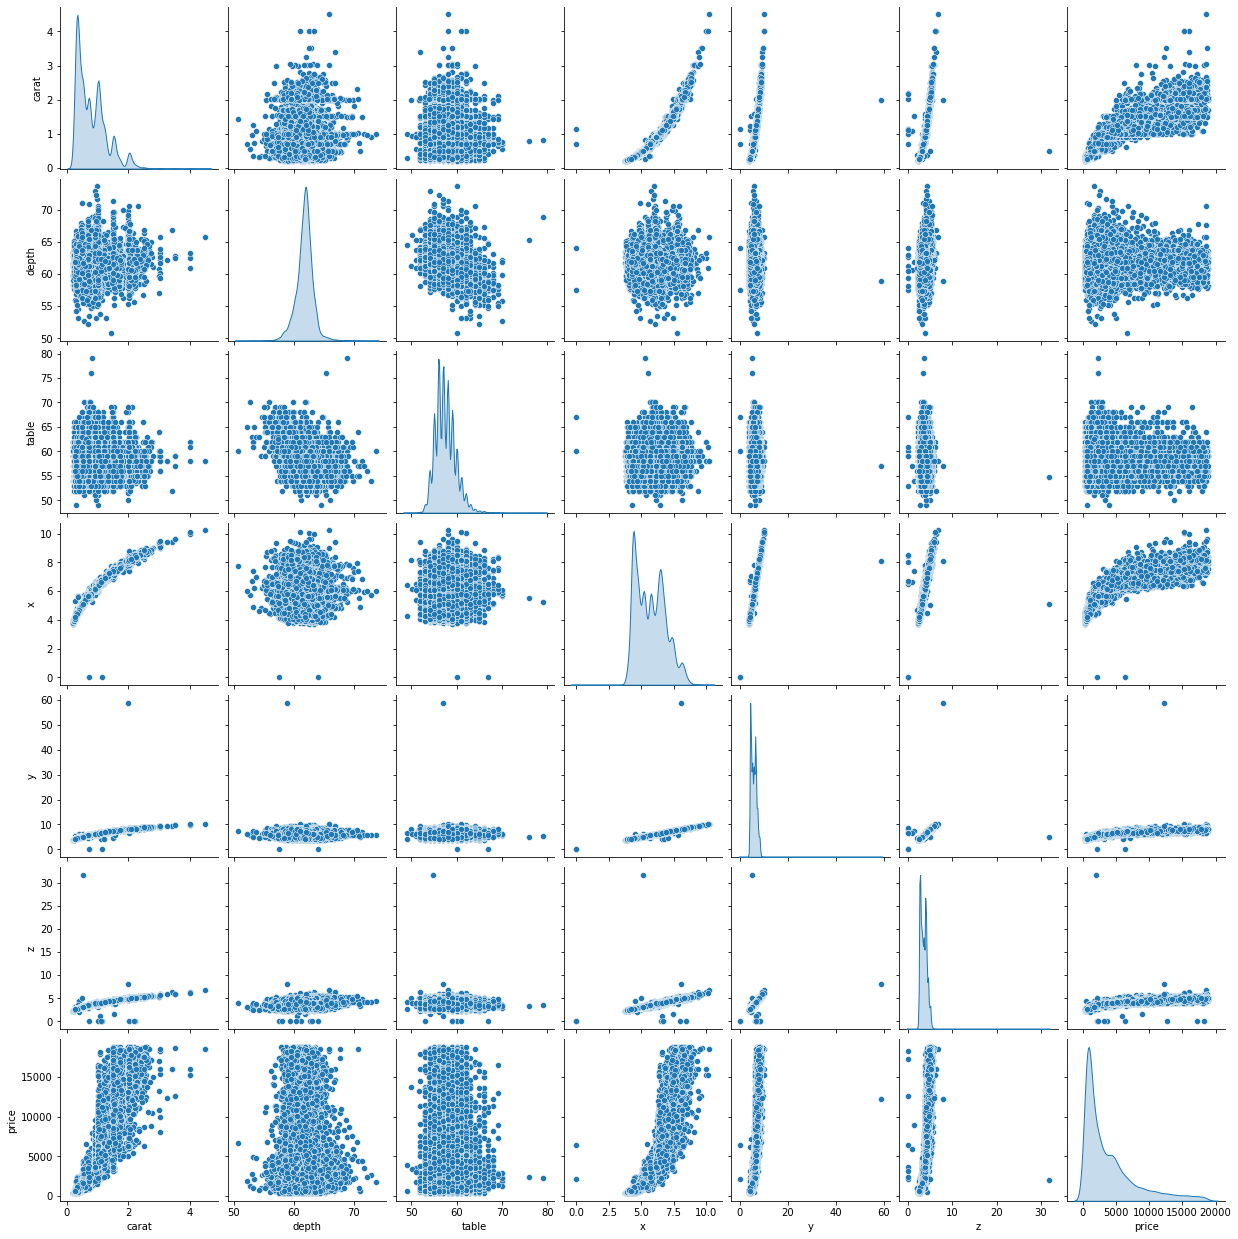

In [15]:
sns.pairplot(gem,diag_kind='kde')

#### Under our analysis, from the pairplot it can be clearly seen that the price of gems lineraly increasing with the increase in carat weight

#### Also the dimensions of gems (x-length,y-breadth,z-height) have also got the linear relationship on the price. As the size of the gem varies, the price is also getting affected 

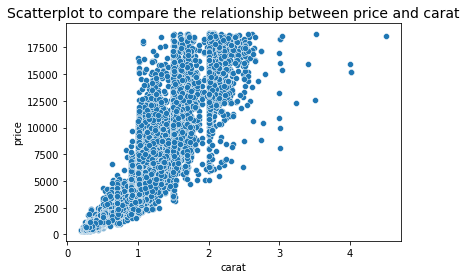

In [16]:
plt.title("Scatterplot to compare the relationship between price and carat",fontsize=14)
sns.scatterplot(gem['carat'],gem['price'])
plt.show()

### What correlation is saying?

In [17]:
# Correlation between the numerical variables

gem.corr()

,carat,depth,table,x,y,z,price
carat,1.000000,0.035240,0.181539,0.976858,0.941442,0.940982,0.922409
depth,0.035240,1.000000,-0.297768,-0.018401,-0.024453,0.101973,-0.002895
table,0.181539,-0.297768,1.000000,0.196254,0.182352,0.148994,0.126844
x,0.976858,-0.018401,0.196254,1.000000,0.962601,0.956490,0.886554
y,0.941442,-0.024453,0.182352,0.962601,1.000000,0.928725,0.856441
z,0.940982,0.101973,0.148994,0.956490,0.928725,1.000000,0.850682
price,0.922409,-0.002895,0.126844,0.886554,0.856441,0.850682,1.000000


### Correlation values clearly confirms that: 
####    Strongly correlated variables with the price of the gem are: Carat, x, y, z

### Correlation Heatmap

<AxesSubplot:>

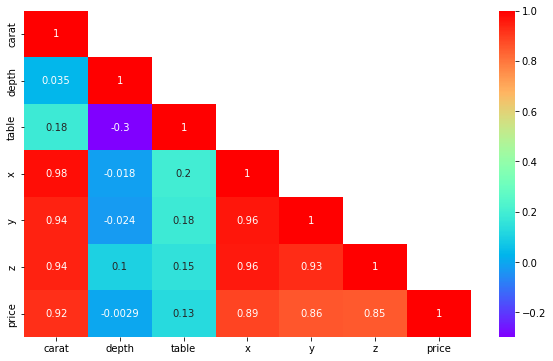

In [18]:
plt.figure(figsize=(10,6))
sns.heatmap(gem.corr(),annot=True,cmap='rainbow',mask=np.triu(gem.corr(),+1))

### Under our analysis,

* <b> Variable carat has got the highest positive correlation with x, y, z and price
* <b> Variable price has got the second highest positive correlation with carat, x, y and z
* <b> Variables depth and table have got the least positive correlation / negative correlation with other variables
* <b> Especially, variable depth is negatively correlated with almost all the variables 

### Categorical variables

### Cut

Which type of cut has the most frequency?

In [19]:
cut_table=pd.crosstab(gem.cut,columns="Frequency")
cut_table

col_0,Frequency
cut,
Fair,780
Good,2435
Ideal,10805
Premium,6886
Very Good,6027


In [20]:
cut_coltotal=cut_table.sum(axis=0)
cut_table.div(cut_coltotal,axis=1)*100

col_0,Frequency
cut,
Fair,2.896075
Good,9.040953
Ideal,40.118071
Premium,25.567148
Very Good,22.377752


<AxesSubplot:xlabel='cut', ylabel='count'>

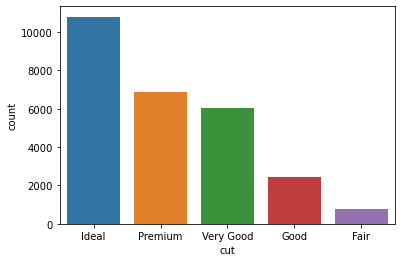

In [21]:
sns.countplot(gem['cut'],order=gem['cut'].value_counts().index)

* <b> Under our analysis, 40% of the gems have ideal cuts whereas only 3 % of the gems have fair cuts

### Color

In [22]:
color_table=pd.crosstab(gem.color,columns="Frequency")
color_table

col_0,Frequency
color,
D,3341
E,4916
F,4723
G,5653
H,4095
I,2765
J,1440


In [23]:
color_coltotal=color_table.sum(axis=0)
color_table.div(color_coltotal,axis=1)*100

col_0,Frequency
color,
D,12.404856
E,18.252701
F,17.536108
G,20.989121
H,15.204396
I,10.266216
J,5.346601


<AxesSubplot:xlabel='color', ylabel='count'>

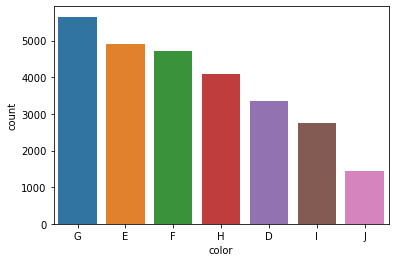

In [24]:
sns.countplot(gem['color'],order=gem['color'].value_counts().index)

* <b> Under our analysis, around 21 % of the gems have color 'G' whereas around 5 % of the gems have color 'J'

### Clarity

In [25]:
clarity_table=pd.crosstab(gem.clarity,columns="Frequency")
clarity_table

col_0,Frequency
clarity,
I1,364
IF,891
SI1,6565
SI2,4564
VS1,4087
VS2,6093
VVS1,1839
VVS2,2530


In [26]:
clarity_coltotal=clarity_table.sum(axis=0)
clarity_table.div(clarity_coltotal,axis=1)*100

col_0,Frequency
clarity,
I1,1.351502
IF,3.308209
SI1,24.375302
SI2,16.945754
VS1,15.174693
VS2,22.622805
VVS1,6.828055
VVS2,9.393681


<AxesSubplot:xlabel='clarity', ylabel='count'>

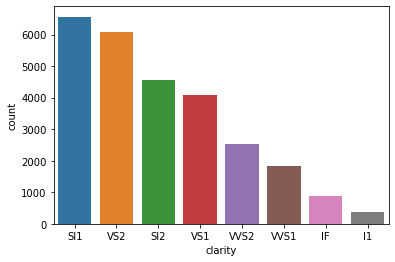

In [27]:
sns.countplot(gem['clarity'],order = gem['clarity'].value_counts().index)

* <b> Under our analysis, nearly 25 % of the gems have SI1 clarity whereas only 1 % of the gems have I1 clarity

### <font color=red> 1.2) Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them?

### Revisiting null values in the dataset

In [28]:
gem.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

* <b> We know that variable 'depth' has got 697  (around 2.5 % of the data- its meaningless to drop) null values which needs to be imputed with the mean since the variable is normally distributed 

### Null values imputation

In [29]:
# Assigning mean values to all the nulls

depth_mean=gem['depth'].mean()
gem['depth']=gem['depth'].fillna(value=depth_mean)

In [30]:
# After imputation, checking for any null values

gem.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

* <b> Now, the are no null values present

### Checking for zero values in the dataset

In [31]:
for variable in gem.columns: 
    print("\nVariable: ",variable)
    print(gem.loc[gem[variable]==0])


Variable:  carat
Empty DataFrame
Columns: [carat, cut, color, clarity, depth, table, x, y, z, price]
Index: []

Variable:  cut
Empty DataFrame
Columns: [carat, cut, color, clarity, depth, table, x, y, z, price]
Index: []

Variable:  color
Empty DataFrame
Columns: [carat, cut, color, clarity, depth, table, x, y, z, price]
Index: []

Variable:  clarity
Empty DataFrame
Columns: [carat, cut, color, clarity, depth, table, x, y, z, price]
Index: []

Variable:  depth
Empty DataFrame
Columns: [carat, cut, color, clarity, depth, table, x, y, z, price]
Index: []

Variable:  table
Empty DataFrame
Columns: [carat, cut, color, clarity, depth, table, x, y, z, price]
Index: []

Variable:  x
       carat   cut color clarity  depth  table    x    y    z  price
5821    0.71  Good     F     SI2   64.1   60.0  0.0  0.0  0.0   2130
17506   1.14  Fair     G     VS1   57.5   67.0  0.0  0.0  0.0   6381

Variable:  y
       carat   cut color clarity  depth  table    x    y    z  price
5821    0.71  Good     F

* <b> Variables x, y and z have got few 0 value records. Since zero values are meaningless they need to be imputed 
* <b> 0's are imputed with median values since x, y and z data distribution is skewed

### Imputation of zero values

In [32]:
gem['x']=gem['x'].replace(0,gem['x'].median())
gem['y']=gem['y'].replace(0,gem['y'].median())
gem['z']=gem['z'].replace(0,gem['z'].median())

In [33]:
# Rechecking for zero values after imputation

for varaible in gem.columns:
    print("\n Variable:",variable)
    print(gem.loc[gem[variable]==0])


 Variable: price
Empty DataFrame
Columns: [carat, cut, color, clarity, depth, table, x, y, z, price]
Index: []

 Variable: price
Empty DataFrame
Columns: [carat, cut, color, clarity, depth, table, x, y, z, price]
Index: []

 Variable: price
Empty DataFrame
Columns: [carat, cut, color, clarity, depth, table, x, y, z, price]
Index: []

 Variable: price
Empty DataFrame
Columns: [carat, cut, color, clarity, depth, table, x, y, z, price]
Index: []

 Variable: price
Empty DataFrame
Columns: [carat, cut, color, clarity, depth, table, x, y, z, price]
Index: []

 Variable: price
Empty DataFrame
Columns: [carat, cut, color, clarity, depth, table, x, y, z, price]
Index: []

 Variable: price
Empty DataFrame
Columns: [carat, cut, color, clarity, depth, table, x, y, z, price]
Index: []

 Variable: price
Empty DataFrame
Columns: [carat, cut, color, clarity, depth, table, x, y, z, price]
Index: []

 Variable: price
Empty DataFrame
Columns: [carat, cut, color, clarity, depth, table, x, y, z, price]
In

* <b> After appropriate imputations, all the variables are free from null and zero values

### <font color=red> 1.3) Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Linear regression. Performance Metrics: Check the performance of Predictions on Train and Test sets using Rsquare, RMSE.

In [75]:
# Creating copies of the gem dataframe

gem1=gem.copy()
gem2=gem.copy()

### Encoding categorical variables

In [76]:
gem1=pd.get_dummies(gem1,columns=['cut', 'color', 'clarity'])
gem1

,carat,depth,table,x,y,z,price,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.30,62.1,58.0,4.27,4.29,2.66,499,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,0.33,60.8,58.0,4.42,4.46,2.70,984,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0.90,62.2,60.0,6.04,6.12,3.78,6289,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0.42,61.6,56.0,4.82,4.80,2.96,1082,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,0.31,60.4,59.0,4.35,4.43,2.65,779,0,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26962,1.11,62.3,58.0,6.61,6.52,4.09,5408,0,0,0,...,0,0,0,0,1,0,0,0,0,0
26963,0.33,61.9,55.0,4.44,4.42,2.74,1114,0,0,1,...,0,0,0,1,0,0,0,0,0,0
26964,0.51,61.7,58.0,5.12,5.15,3.17,1656,0,0,0,...,0,0,0,0,0,0,0,1,0,0
26965,0.27,61.8,56.0,4.19,4.20,2.60,682,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [77]:
continuous,category=[],[]
for cols in gem1:
    if len(gem1[cols].unique())>5:
        continuous.append(cols)
        
    else:
        category.append(cols)

In [78]:
continuous

['carat', 'depth', 'table', 'x', 'y', 'z', 'price']

In [83]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
gem1[continuous]= scaler.fit_transform(gem1[continuous])


In [84]:
gem1

,carat,depth,table,x,y,z,price,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-1.043547,0.254491,0.243737,-1.296116,-1.240176,-1.225062,-0.854828,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,-0.980684,-0.678196,0.243737,-1.162932,-1.094124,-1.169302,-0.734256,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0.213713,0.326236,1.139749,0.275452,0.332032,0.336211,0.584584,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,-0.792095,-0.104235,-0.652274,-0.807776,-0.802020,-0.806864,-0.709892,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,-1.022593,-0.965177,0.691743,-1.225085,-1.119898,-1.239002,-0.785219,0,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26962,0.653754,0.397981,0.243737,0.781550,0.675685,0.768349,0.365564,0,0,0,...,0,0,0,0,1,0,0,0,0,0
26963,-0.980684,0.111000,-1.100279,-1.145174,-1.128489,-1.113543,-0.701937,0,0,1,...,0,0,0,1,0,0,0,0,0,0
26964,-0.603506,-0.032490,0.243737,-0.541408,-0.501324,-0.514126,-0.567194,0,0,0,...,0,0,0,0,0,0,0,1,0,0
26965,-1.106410,0.039255,-0.652274,-1.367147,-1.317498,-1.308702,-0.809334,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [81]:
gem1[continuous]= scaler.inverse_transform(gem1[continuous])
gem1

,carat,depth,table,x,y,z,price,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.30,62.1,58.0,4.27,4.29,2.66,499.0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,0.33,60.8,58.0,4.42,4.46,2.70,984.0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0.90,62.2,60.0,6.04,6.12,3.78,6289.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0.42,61.6,56.0,4.82,4.80,2.96,1082.0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,0.31,60.4,59.0,4.35,4.43,2.65,779.0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26962,1.11,62.3,58.0,6.61,6.52,4.09,5408.0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
26963,0.33,61.9,55.0,4.44,4.42,2.74,1114.0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
26964,0.51,61.7,58.0,5.12,5.15,3.17,1656.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
26965,0.27,61.8,56.0,4.19,4.20,2.60,682.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [70]:
gem1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26933 entries, 0 to 26966
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   carat          26933 non-null  float64
 1   depth          26933 non-null  float64
 2   table          26933 non-null  float64
 3   x              26933 non-null  float64
 4   y              26933 non-null  float64
 5   z              26933 non-null  float64
 6   price          26933 non-null  int64  
 7   cut_Fair       26933 non-null  uint8  
 8   cut_Good       26933 non-null  uint8  
 9   cut_Ideal      26933 non-null  uint8  
 10  cut_Premium    26933 non-null  uint8  
 11  cut_Very Good  26933 non-null  uint8  
 12  color_D        26933 non-null  uint8  
 13  color_E        26933 non-null  uint8  
 14  color_F        26933 non-null  uint8  
 15  color_G        26933 non-null  uint8  
 16  color_H        26933 non-null  uint8  
 17  color_I        26933 non-null  uint8  
 18  color_

### Split the dataset  :  train:test = 70:30

In [85]:
X=gem1.drop('price',axis=1)
y=gem1.pop('price')

In [86]:
X

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-1.043547,0.254491,0.243737,-1.296116,-1.240176,-1.225062,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,-0.980684,-0.678196,0.243737,-1.162932,-1.094124,-1.169302,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,0.213713,0.326236,1.139749,0.275452,0.332032,0.336211,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,-0.792095,-0.104235,-0.652274,-0.807776,-0.802020,-0.806864,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,-1.022593,-0.965177,0.691743,-1.225085,-1.119898,-1.239002,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26962,0.653754,0.397981,0.243737,0.781550,0.675685,0.768349,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
26963,-0.980684,0.111000,-1.100279,-1.145174,-1.128489,-1.113543,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
26964,-0.603506,-0.032490,0.243737,-0.541408,-0.501324,-0.514126,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
26965,-1.106410,0.039255,-0.652274,-1.367147,-1.317498,-1.308702,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [43]:
from sklearn.model_selection import train_test_split

In [87]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

## <font color = darkblue> Linear Regression Model from Sci-kit learn library

### Model fitting using the train dataset

In [88]:
lin_model=LinearRegression()
lin_model.fit(X_train,y_train)

LinearRegression()

### Coefficients of independent attributes of the model

In [89]:
for idx,col_name in enumerate(X_train.columns):
    print("Coefficient of {} is {}".format(col_name,lin_model.coef_[idx]))

Coefficient of carat is 1.3539613623064546
Coefficient of depth is -0.02245243724697383
Coefficient of table is -0.0142863147733589
Coefficient of x is -0.29698554614918216
Coefficient of y is 0.0011251383947067839
Coefficient of z is -0.009541153901560583
Coefficient of cut_Fair is -0.1341951369246185
Coefficient of cut_Good is 0.0001611335973131404
Coefficient of cut_Ideal is 0.06133378470371892
Coefficient of cut_Premium is 0.038581654831358704
Coefficient of cut_Very Good is 0.034118563792228385
Coefficient of color_D is 0.20826036042636623
Coefficient of color_E is 0.1586174212432391
Coefficient of color_F is 0.1397108476006945
Coefficient of color_G is 0.08786634174637485
Coefficient of color_H is -0.038645045630730616
Coefficient of color_I is -0.16860982052703605
Coefficient of color_J is -0.3872001048589079
Coefficient of clarity_I1 is -0.945316732788355
Coefficient of clarity_IF is 0.3694906434426067
Coefficient of clarity_SI1 is -0.03647978614064027
Coefficient of clarity_SI

### Intercept of the model

In [90]:
intercept=lin_model.intercept_
print("Intercept value of the model:",intercept)

Intercept value of the model: -0.13799459282012855


## Training the model

### Coefficient of determination R_square score of the prediction on the training dataset

In [91]:
lin_model.score(X_train,y_train)

0.9199011403632966

* <b> Coefficient of determination R_square score is close to 1. Hence, its considered as a good model

In [92]:
ytrain_pred=lin_model.predict(X_train)
ytrain_pred

array([ 0.54000186, -0.97382635,  0.5767518 , ...,  0.7891355 ,
        0.32775533,  1.09108054])

### Model performance checks on the training sets

In [93]:
y_train

24641    0.392165
22290   -0.796903
7079     0.399871
1850     0.968924
8093    -0.593298
           ...   
10962   -0.811571
17304   -0.566946
5193     0.600743
12179    0.225601
235      1.120820
Name: price, Length: 21546, dtype: float64

In [94]:
ytrain_pred

array([ 0.54000186, -0.97382635,  0.5767518 , ...,  0.7891355 ,
        0.32775533,  1.09108054])

In [109]:
# MAE 

MAE=np.mean(np.abs(y_train-ytrain_pred))
print("Mean Absolute Error:",MAE)

Mean Absolute Error: 0.18472816321472785


In [110]:
# Mean Squared Error (MSE)

MSE=np.mean((y_train-ytrain_pred)**2)
print("Mean Squared Value is :",MSE)

Mean Squared Value is : 0.07973143286612389


In [111]:
# RMSE
 
RMSE=np.sqrt(MSE)
print("Root Mean Squared Value is :",RMSE)

Root Mean Squared Value is : 0.28236754924410823


## Testing the model

### Coefficient of determination R_square score of the prediction on the test dataset

In [112]:
lin_model.score(X_test,y_test)

0.9274956557514865

* <b> Coefficient of determination R_square score on the test data set is also close to 1. Hence, its considered as a good model

In [113]:
ytest_pred=lin_model.predict(X_test)
ytest_pred

array([0.66251652, 0.26321007, 1.4964333 , ..., 1.17229995, 0.5578422 ,
       0.10804266])

### Model performance checks on the training sets

In [114]:
# Mean Absolute Error (MAE) 

MAE=np.mean(abs(y_test-ytest_pred))
print("Mean Absolute Error:",MAE)

Mean Absolute Error: 0.1836836050671757


In [115]:
# Mean Squared Error (MSE)

MSE=np.mean((y_test-ytest_pred)**2)
print("Mean Squared Value is :",MSE)

Mean Squared Value is : 0.0738327858557255


In [116]:
# RMSE
 
RMSE=np.sqrt(MSE)
print("Root Mean Squared Value is :",RMSE)

Root Mean Squared Value is : 0.2717218906450592


### Pairplot

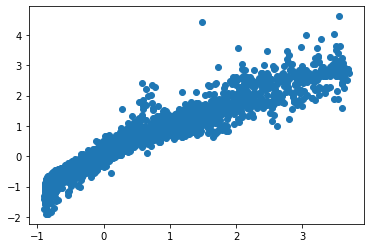

In [117]:
plt.scatter(y_test,ytest_pred)

## <font color=darkblue> Linear Regression Model using Statsmodels OLS

In [120]:
data_train=pd.concat([X_train,y_train],axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
                    

In [121]:
data_train.rename(columns = {"cut_Fair":"cut_fair", "cut_Good":"cut_good", "cut_Ideal":"cut_ideal",
                             "cut_Premium":"cut_premium", "cut_Very Good":"cut_verygood"}, inplace=True)
data_test.rename(columns = {"cut_Fair":"cut_fair", "cut_Good":"cut_good", "cut_Ideal":"cut_ideal",
                             "cut_Premium":"cut_premium", "cut_Very Good":"cut_verygood"}, inplace=True)

In [122]:
express = 'price ~ carat + depth + table + x + y + z + cut_fair + cut_good + cut_ideal + cut_premium + cut_verygood + color_D + color_E + color_F + color_G + color_H + color_I + color_J + clarity_I1 + clarity_IF + clarity_SI1 + clarity_SI2 + clarity_VS1 + clarity_VS2 + clarity_VVS1 + clarity_VVS2'

In [123]:
lm = sm.ols(formula=express, data=data_train).fit()
lm

In [124]:
lm.params

Intercept      -0.094011
carat           1.353961
depth          -0.022452
table          -0.014286
x              -0.296986
y               0.001125
z              -0.009541
cut_fair       -0.152997
cut_good       -0.018641
cut_ideal       0.042532
cut_premium     0.019779
cut_verygood    0.015316
color_D         0.194830
color_E         0.145187
color_F         0.126281
color_G         0.074436
color_H        -0.052075
color_I        -0.182040
color_J        -0.400630
clarity_I1     -0.957068
clarity_IF      0.357739
clarity_SI1    -0.048231
clarity_SI2    -0.292382
clarity_VS1     0.179079
clarity_VS2     0.101069
clarity_VVS1    0.287891
clarity_VVS2    0.277892
dtype: float64

In [125]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                 1.075e+04
Date:                Fri, 04 Nov 2022   Prob (F-statistic):               0.00
Time:                        00:33:34   Log-Likelihood:                -3326.5
No. Observations:               21546   AIC:                             6701.
Df Residuals:                   21522   BIC:                             6893.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0940      0.003    -35.178      0.000      -0.099      -0.089
carat            1.3540      0.010    139.813      0.000       1.335       1.373
depth           -0.0225      0.002     -9.184      0.000      -0.027      -0.018
table           -0.0143      0.003     -5.573      0.000      -0.019      -0.009
x               -0.2970      0.013    -23.260      0.000      -0.322      -0.272
y                0.0011      0.006      0.175      0.861      -0.011       0.014
z               -0.0095      0.007     -1.379      0.168      -0.023       0.004
cut_fair        -0.1530      0.010    -14.930      0.000      -0.173      -0.133
cut_good        -0.0186      0.006     -3.168      0.002      -0.030      -0.007
cut_ideal        0.0425      0.005      9.435      0.000       0.034       0.051
cut_premium      0.0198      0.004      4.680      0.000       0.011       0.028
cut_verygood     0.0153      0.004      3.619      0.000       0.007       0.024
color_D          0.1948      0.005     37.192      0.000       0.185       0.205
color_E          0.1452      0.004     32.877      0.000       0.137       0.154
color_F          0.1263      0.004     28.285      0.000       0.118       0.135
color_G          0.0744      0.004     17.979      0.000       0.066       0.083
color_H         -0.0521      0.005    -11.156      0.000      -0.061      -0.043
color_I         -0.1820      0.006    -32.543      0.000      -0.193      -0.171
color_J         -0.4006      0.008    -52.705      0.000      -0.416      -0.386
clarity_I1      -0.9571      0.015    -62.892      0.000      -0.987      -0.927
clarity_IF       0.3577      0.010     36.327      0.000       0.338       0.377
clarity_SI1     -0.0482      0.004    -10.753      0.000      -0.057      -0.039
clarity_SI2     -0.2924      0.005    -56.611      0.000      -0.303      -0.282
clarity_VS1      0.1791      0.005     34.720      0.000       0.169       0.189
clarity_VS2      0.1011      0.005     22.376      0.000       0.092       0.110
clarity_VVS1     0.2879      0.007     40.034      0.000       0.274       0.302
clarity_VVS2     0.2779      0.006     44.595      0.000       0.266       0.290
==============================================================================
Omnibus:                     5715.360   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           220004.693
Skew:                           0.567   Prob(JB):                         0.00
Kurtosis:                      18.613   Cond. No.                     1.84e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.51e-28. This might indicate that there are
str

* <b> The overall p-value is 0 and the Adjusted R-square value is 0.920. 
* <b> Hypothesis testing in linear regression states that:
    
   * <b> Null hypothesis(H0): There is no relationship between the target variable and any of the independent variables
    
   * <b> Alternate hypothesis(H1): There is a relationship between the target variable and any of the independent variables
    
* <b> Since p-value <0.05,we believe that H0 is not true and we fail to accept the null hypothesis
                             
* <b> There exists a relationshp between between the predictors and target

### Linear Regression Equation

In [126]:
for i,j in np.array(lm.params.reset_index()):
    print("({}) * {} +".format(round(j,2),i),end=' ')

(-0.09) * Intercept + (1.35) * carat + (-0.02) * depth + (-0.01) * table + (-0.3) * x + (0.0) * y + (-0.01) * z + (-0.15) * cut_fair + (-0.02) * cut_good + (0.04) * cut_ideal + (0.02) * cut_premium + (0.02) * cut_verygood + (0.19) * color_D + (0.15) * color_E + (0.13) * color_F + (0.07) * color_G + (-0.05) * color_H + (-0.18) * color_I + (-0.4) * color_J + (-0.96) * clarity_I1 + (0.36) * clarity_IF + (-0.05) * clarity_SI1 + (-0.29) * clarity_SI2 + (0.18) * clarity_VS1 + (0.1) * clarity_VS2 + (0.29) * clarity_VVS1 + (0.28) * clarity_VVS2 + 

### <font color=red> 1.4) Inference: Basis on these predictions, what are the business insights and recommendations.

### Feature Importances

In [127]:
feature_imp=lm.params
feature_imp=feature_imp[1:]

In [128]:
feature_imp

carat           1.353961
depth          -0.022452
table          -0.014286
x              -0.296986
y               0.001125
z              -0.009541
cut_fair       -0.152997
cut_good       -0.018641
cut_ideal       0.042532
cut_premium     0.019779
cut_verygood    0.015316
color_D         0.194830
color_E         0.145187
color_F         0.126281
color_G         0.074436
color_H        -0.052075
color_I        -0.182040
color_J        -0.400630
clarity_I1     -0.957068
clarity_IF      0.357739
clarity_SI1    -0.048231
clarity_SI2    -0.292382
clarity_VS1     0.179079
clarity_VS2     0.101069
clarity_VVS1    0.287891
clarity_VVS2    0.277892
dtype: float64

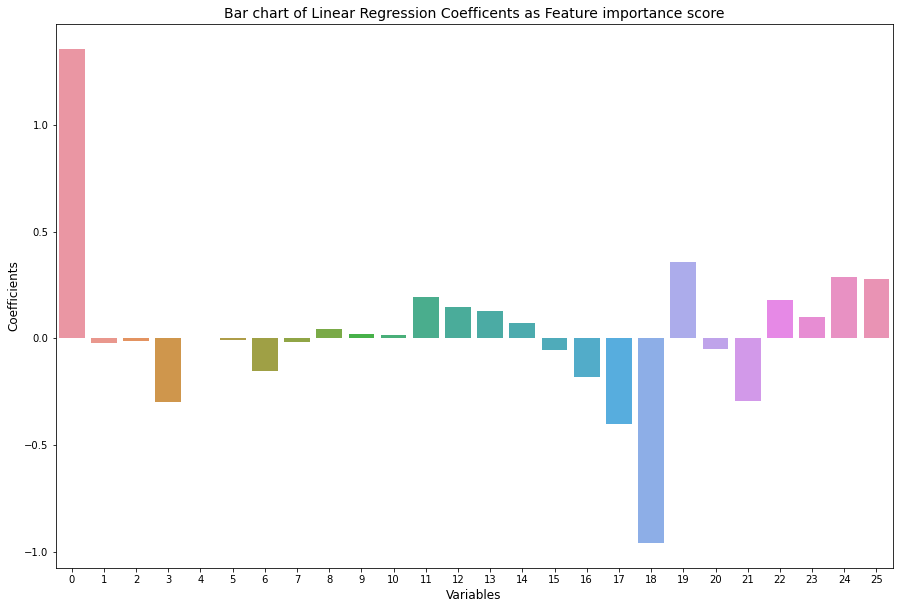

In [129]:
plt.figure(figsize=(15,10))
sns.barplot([i for i in range(len(feature_imp))], feature_imp)

plt.title("Bar chart of Linear Regression Coefficents as Feature importance score",fontsize=14)
plt.xlabel("Variables",fontsize=12)
plt.ylabel("Coefficients",fontsize=12)
plt.show()

### Conclusion

<b> From the dataset its known that

* <b> The categorical variable cut describes the quality of cubic zirconia cut. In an increasing order of ranking: Fair, Good, Very Good, Premium and Ideal
    
* <b> The categorical variable color describes the color of cubic zirconia. In an decreasing order of ranking: D, E, F, G, H, I and J
    
* <b> The categorical variable clarity describes the absence of any inclusions. In an decreasing order of ranking:clarity_IF,
clarity_VVS1, clarity_VVS2, clarity_VS1, clarity_VS2, clarity_SI1, clarity_SI2, clarity_I1

## <font color=blue> The final Linear Regression Equation of the model is
    
   <b> price=(-0.09) * Intercept + (1.38) * carat + (-0.02) * depth + (-0.01) * table + (-0.32) * x + (-0.0) * y + (-0.01) * z + (-0.15) * cut_fair + (-0.02) * cut_good + (0.04) * cut_ideal + (0.02) * cut_premium + (0.02) * cut_verygood + (0.2) * color_D + (0.15) * color_E + (0.13) * color_F + (0.07) * color_G + (-0.05) * color_H + (-0.18) * color_I + (-0.4) * color_J + (-0.92) * clarity_I1 + (0.36) * clarity_IF + (-0.05) * clarity_SI1 + (-0.3) * clarity_SI2 + (0.17) * clarity_VS1 + (0.1) * clarity_VS2 + (0.28) * clarity_VVS1 + (0.27) * clarity_VVS2

## <font color = darkblue> BUSINESS RECOMMENDATIONS

- When the carat weight of cubic zirconia increases by 1 unit , then the price increases by 11631 units keeping all other predictors constant 
- There are so many negative coefficients exists in the equation. For instance, With every 1 unit increase in clarity_I1, the price of the cubic zirconia falls by 3112 units keeping all other predictors constant 
- The 5 most significant attributes that majorly influences the price of cubic zirconia are carat, clarity_I1, clarity_IF, clarity_VVS1 and clarity_VVS2
- For a better profitability, it is recommended that the company should sell more of cubic zirconias which are having higher carats with an ideal cut quality, IF clarity and color D
- Its also recommended that the company should sell less cubic zirconias which are having higher depth, higher table, fair cut, color J and I1 clarity